# Mapping Guide IDs between labs
This notebook describes the current guide annotations provided by the Hon and Huangfu labs, and creates a master list of guide IDs to use for downstream analysis

# Set-up

In [2]:
%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Paths: TODO update if necessary
#local_path = "/cellar/users/aklie/data/datasets/tf_perturb_seq/ref/"
#local_path = "C:/Users/seg95/Documents/tf_perturb_seq/"
local_path = "D:/tf_perturb_seq/"

In [5]:
# Guide ref files
path_huangfu_guide_ref = local_path + "Huangfu_ref_feature.csv"
path_hon_guide_ref = local_path + "Hon_sgRNA_index_dacc_annot_reference.csv"
path_gersbach_guide_ref = local_path + "Gersbach_feature_ref_5.csv"
path_engreitz_guide_ref = local_path + "eTN7_guides_filtered.csv"

# Other reference files
path_non_targeting = local_path + "non_targeting.tsv"
path_negative_controls = local_path + "negative_controls.tsv"
path_positive_controls = local_path + "positive_controls.tsv"
path_targets = local_path + "target_genes.tsv"

# Load in auxiliary data

In [6]:
# Load in the reference files
negative_controls = pd.read_csv(path_negative_controls, sep="\t")
positive_controls = pd.read_csv(path_positive_controls, sep="\t")
non_targeting = pd.read_csv(path_non_targeting, sep="\t")
targets = pd.read_csv(path_targets, sep="\t")
print(f"Loaded {len(negative_controls)} negative controls, {len(positive_controls)} positive controls, {len(non_targeting)} non-targeting guides, and {len(targets)} targets.")

Loaded 100 negative controls, 19 positive controls, 600 non-targeting guides, and 2210 targets.


In [7]:
# Get a list of genes for negative controls
negative_control_genes = negative_controls["Gene"].values

In [8]:
# Get a list of photospacers for negative controls
negative_control_guide_photospacers = negative_controls[['Photospacer 1', 'Photospacer 2', 'Photospacer 3', 'Photospacer 4', 'Photospacer 5', 'Photospacer 6']].values.flatten()
negative_control_guide_photospacers = [str(x).upper() for x in negative_control_guide_photospacers]

In [9]:
# Get a list of genes for positive controls
positive_control_genes = positive_controls["Gene"].str.split(" ").str[0].values
positive_control_genes

array(['CD81', 'CD81', 'CD151', 'CD151', 'CD55', 'CD29', 'B2M', 'AARS',
       'AARS', 'AARS', 'POLR1D', 'POLR1D', 'POLR1D', 'DNAJC19', 'DNAJC19',
       'DNAJC19', 'MALAT1', 'NGFRAP1', 'TFRC'], dtype=object)

In [10]:
# Get non-targeting guide IDs
non_targeting_ids = non_targeting["Unnamed: 0"].values

# Huangfu annotations

In [11]:
# Read Huangfu lab guide reference
huangfu_guide_ref = pd.read_csv(path_huangfu_guide_ref)
print(f"Total guides in Huangfu lab reference: {huangfu_guide_ref.shape[0]}")

Total guides in Huangfu lab reference: 14364


In [12]:
# Describe the dataframes
huangfu_guide_ref.describe()

,id,name,read,pattern,sequence,feature_type
count,14364,14364,14364,14364,14364,14364
unique,14364,2937,1,1,14364,1
top,ZNF226_P1_5|ZNF234_P1_5,APITD1|APITD1-CORT,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GTTCCGCTCCAGGGAAGAGG,Custom
freq,1,6,14364,14364,1,14364


In [13]:
# how many ids start with non-targeting
huangfu_guide_ref["id"].str.startswith("non-targeting").sum()

np.int64(600)

In [14]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_huangfu = huangfu_guide_ref[huangfu_guide_ref["id"].isin(non_targeting_ids)]
print(f"Non-targeting guides in Huangfu reference: {non_targeting_ids_in_huangfu.shape[0]}")
non_targeting_match = non_targeting_ids_in_huangfu["id"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in Huangfu reference: 600
Do non-targeting guides match? True


In [15]:
# Get a target column representing the gene target (if targeting)
huangfu_guide_ref["target"] = huangfu_guide_ref["id"].str.split("|").str[0].str.split("_").str[0]
huangfu_guide_ref["target"].value_counts().iloc[:25]

target
non-targeting    600
ESRRG             30
FOXP1             21
ZNF83             18
SOX6              18
ZNF718            16
HIVEP3            16
SMARCB1           12
RBL2              12
SIN3A             12
GATA6             12
TULP3             12
TP53BP1           12
SUB1              12
CGGBP1            12
CPEB1             12
CRAMP1L           12
FOXD3             12
FOXN3             12
FOXO3             12
AKNA              12
ARX               12
ATXN7             12
BAZ2A             12
BMP2              12
Name: count, dtype: int64

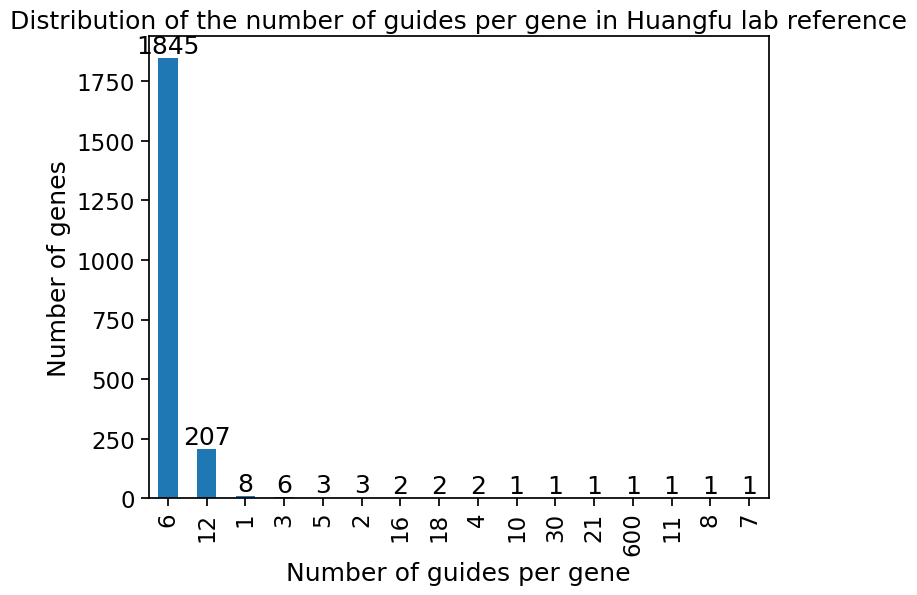

In [16]:
# Plot a 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    huangfu_guide_ref["target"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(huangfu_guide_ref["target"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in Huangfu lab reference")
    plt.show()

In [17]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
huangfu_guide_ref["target"].isin(negative_control_genes).sum()

np.int64(598)

In [18]:
# how many ids start with "OR", should ideally be same as above
huangfu_guide_ref["id"].str.startswith("OR").sum()

np.int64(598)

In [19]:
# Are these two the same?
negative_control_ids_in_huangfu = huangfu_guide_ref[huangfu_guide_ref["target"].isin(negative_control_genes)]
print(f"Negative control guides in Huangfu reference: {negative_control_ids_in_huangfu.shape[0]}")
negative_control_match = negative_control_ids_in_huangfu["target"].isin(negative_control_genes)
print(f"Do negative control guides match? {negative_control_match.all()}")

Negative control guides in Huangfu reference: 598
Do negative control guides match? True


In [20]:
# Are we missing any negative control genes? Or are there just some missing guides
set(negative_control_genes).difference(huangfu_guide_ref["target"])

set()

In [21]:
# How many photospacers are in the negative control list?
len(negative_control_guide_photospacers)

600

In [22]:
# What is the difference
set(negative_control_guide_photospacers) - set(huangfu_guide_ref[huangfu_guide_ref["target"].isin(negative_control_genes)]["sequence"].values)

set()

In [23]:
# Are their photospacers in the negative control list that are repeated?
len(negative_control_guide_photospacers), len(set(negative_control_guide_photospacers))

(600, 598)

In [24]:
# Which negative_control_guide_photospacers are repeated
pd.Series(negative_control_guide_photospacers).value_counts()

GCCTATGGTTCATGAGGACA    2
GGGCATCCCAACCAAGAAGA    2
GACCAGTGTCAGCCAAGTCT    1
GAGGCATTGGATGAAATTTC    1
GAAAATACAGATGCTTGTGT    1
                       ..
GGGTTAAAGGGCTCAGTGCG    1
GTTGTTGCCTGTGTCCATTG    1
GGGGGTATGCAACTGATGGG    1
GATGGGGGTATGCAACTGAT    1
GTGAGACAGGGCATTGGTAC    1
Name: count, Length: 598, dtype: int64

In [25]:
# What about positive controls, should have 19?
huangfu_guide_ref["target"].isin(positive_control_genes).sum()

np.int64(18)

In [26]:
# What's the difference
set(positive_control_genes).difference(huangfu_guide_ref["target"])

{'CD29'}

In [27]:
# Is it becuase CD29 is called ITGB1
huangfu_guide_ref[huangfu_guide_ref["id"] == "ITGB1"]

,id,name,read,pattern,sequence,feature_type,target
5,ITGB1,ITGB1,R2,(BC)GTTTAAGAGCTAAGCTGGAA,GAGAGGCCCAGCGGGAGTCG,Custom,ITGB1


In [28]:
# add ITGB1 to positive control list
if "ITGB1" not in positive_control_genes:
    positive_control_genes = np.append(positive_control_genes, "ITGB1")
len(positive_control_genes)

20

In [29]:
# What about positive controls, should have 19?
huangfu_guide_ref["target"].isin(positive_control_genes).sum()

np.int64(19)

In [30]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_huangfu(row):
    if row["id"].startswith("non-targeting"):
        return "non_targeting"
    elif row["id"].startswith("OR"):
        return "negative_control"
    elif row["target"] in positive_control_genes:
        return "positive_control"
    else:
        return "targeting"
    
huangfu_guide_ref["type"] = huangfu_guide_ref.apply(annotate_guide_type_huangfu, axis=1)
guide_type_counts = huangfu_guide_ref["type"].value_counts()
print(guide_type_counts)

type
targeting           13147
non_targeting         600
negative_control      598
positive_control       19
Name: count, dtype: int64


# Hon annotations

In [31]:
# Read Hon lab guide reference
hon_guide_ref = pd.read_csv(path_hon_guide_ref, sep="\t")
hon_guide_ref["protospacer_upper"] = hon_guide_ref["protospacer"].str.upper()  # create protospacer_upper column
print(f"Total guides in Hon lab reference: {hon_guide_ref.shape[0]}")

Total guides in Hon lab reference: 14358


In [32]:
# Describe the dataframes
hon_guide_ref.describe()

,protospacer_ID,protospacer,intended_target_name,type,genomic_element,reverse_compliment,protospacer_upper
count,14358,14358,14358,14358,14358,14358,14358
unique,14358,14358,2087,2,1,14358,14358
top,DNAJC19_ main,GTCATGGACTCGGAGATTAG,non-targeting,targeting,promoter,CTAATCTCCGAGTCCATGAC,GTCATGGACTCGGAGATTAG
freq,1,1,600,13758,14358,1,1


In [33]:
#. Check the types of guides in the Hon lab reference
hon_guide_ref["type"].value_counts()

type
targeting        13758
non-targeting      600
Name: count, dtype: int64

In [34]:
# how many ids start with non-targeting
hon_guide_ref["protospacer_ID"].str.startswith("non-targeting").sum()

np.int64(600)

In [35]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_hon = hon_guide_ref[hon_guide_ref["protospacer_ID"].isin(non_targeting_ids)]
print(f"Non-targeting guides in hon reference: {non_targeting_ids_in_hon.shape[0]}")
non_targeting_match = non_targeting_ids_in_hon["protospacer_ID"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in hon reference: 600
Do non-targeting guides match? True


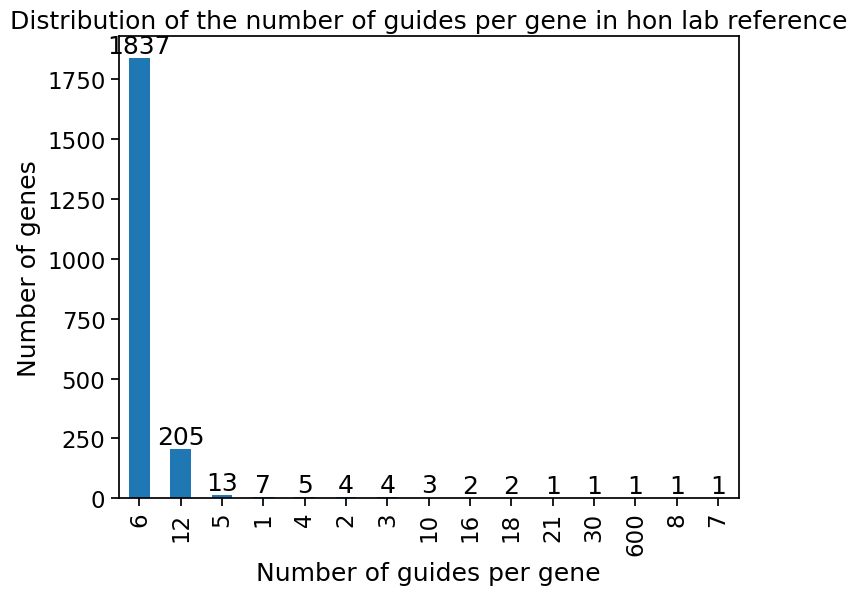

In [36]:
# Plot a 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    hon_guide_ref["intended_target_name"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(hon_guide_ref["intended_target_name"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in hon lab reference")
    plt.show()

In [37]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
hon_guide_ref["intended_target_name"].isin(negative_control_genes).sum()

np.int64(598)

In [38]:
# how many ids start with "OR", should ideally be same as above
hon_guide_ref["intended_target_name"].str.startswith("OR").sum()

np.int64(598)

In [39]:
# Are these two the same?
negative_control_ids_in_hon = hon_guide_ref[hon_guide_ref["intended_target_name"].isin(negative_control_genes)]
print(f"Negative control guides in Hon reference: {negative_control_ids_in_hon.shape[0]}")
negative_control_match = negative_control_ids_in_hon["intended_target_name"].isin(negative_control_genes)
print(f"Do negative control guides match? {negative_control_match.all()}")

Negative control guides in Hon reference: 598
Do negative control guides match? True


In [40]:
# Are we missing any negative control genes? Or are there just some missing guides
set(negative_control_genes).difference(hon_guide_ref["intended_target_name"])

set()

In [41]:
# How many photospacers are in the negative control list?
len(negative_control_guide_photospacers)

600

In [42]:
# What is the difference
set(negative_control_guide_photospacers) - set(hon_guide_ref[hon_guide_ref["intended_target_name"].isin(negative_control_genes)]["protospacer_upper"].values)

set()

In [43]:
# Are their photospacers in the negative control list that are repeated?
len(negative_control_guide_photospacers), len(set(negative_control_guide_photospacers))

(600, 598)

In [44]:
# Which negative_control_guide_photospacers are repeated
pd.Series(negative_control_guide_photospacers).value_counts()

GCCTATGGTTCATGAGGACA    2
GGGCATCCCAACCAAGAAGA    2
GACCAGTGTCAGCCAAGTCT    1
GAGGCATTGGATGAAATTTC    1
GAAAATACAGATGCTTGTGT    1
                       ..
GGGTTAAAGGGCTCAGTGCG    1
GTTGTTGCCTGTGTCCATTG    1
GGGGGTATGCAACTGATGGG    1
GATGGGGGTATGCAACTGAT    1
GTGAGACAGGGCATTGGTAC    1
Name: count, Length: 598, dtype: int64

In [45]:
# What about positive controls, should have 19?
hon_guide_ref["intended_target_name"].isin(positive_control_genes).sum()

np.int64(19)

In [46]:
# What's the difference
set(positive_control_genes).difference(hon_guide_ref["intended_target_name"])

{'ITGB1'}

In [47]:
# Is it becuase CD29 is called ITGB1
hon_guide_ref[hon_guide_ref["protospacer_ID"] == "ITGB1"]

,protospacer_ID,protospacer,intended_target_name,type,genomic_element,reverse_compliment,protospacer_upper


In [48]:
# add ITGB1 to positive control list
if "ITGB1" not in positive_control_genes:
    positive_control_genes = np.append(positive_control_genes, "ITGB1")
len(positive_control_genes)

20

In [49]:
# What about positive controls, should have 19?
hon_guide_ref["intended_target_name"].isin(positive_control_genes).sum()

np.int64(19)

In [50]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_hon(row):
    if row["protospacer_ID"].startswith("non-targeting"):
        return "non_targeting"
    elif row["protospacer_ID"].startswith("OR"):
        return "negative_control"
    elif row["intended_target_name"] in positive_control_genes:
        return "positive_control"
    else:
        return "targeting"
    
hon_guide_ref["type"] = hon_guide_ref.apply(annotate_guide_type_hon, axis=1)
guide_type_counts = hon_guide_ref["type"].value_counts()
print(guide_type_counts)

type
targeting           13141
non_targeting         600
negative_control      598
positive_control       19
Name: count, dtype: int64


# Gersbach annotations

In [51]:
gersbach_guide_ref = pd.read_csv(path_gersbach_guide_ref)
print(f"Total guides in Gersbach lab reference: {gersbach_guide_ref.shape[0]}")

Total guides in Gersbach lab reference: 17034


In [52]:
# Describe the dataframes
gersbach_guide_ref.describe()

,id,name,read,pattern,sequence,feature_type,target_gene_name
count,17034,17034,17034,17034,17034,17034,17034
unique,17034,17034,1,1,17034,1,2989
top,SPDYE8P.14,SPDYE8P.14,R2,TTCCAGCTTAGCTCTTAAAC(BC),ACAAGACTGGAGTAATTTT,CRISPR Guide Capture,non-targeting
freq,1,1,17034,17034,1,17034,600


In [53]:
# Check the types of guides in the Gersbach lab reference
gersbach_guide_ref["feature_type"].value_counts()

feature_type
CRISPR Guide Capture    17034
Name: count, dtype: int64

In [54]:
# how many ids start with non-targeting
gersbach_guide_ref["id"].str.startswith("non-targeting").sum()

np.int64(600)

In [55]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_gersbach = gersbach_guide_ref[gersbach_guide_ref["id"].isin(non_targeting_ids)]
print(f"Non-targeting guides in gersbach reference: {non_targeting_ids_in_gersbach.shape[0]}")
non_targeting_match = non_targeting_ids_in_gersbach["id"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in gersbach reference: 600
Do non-targeting guides match? True


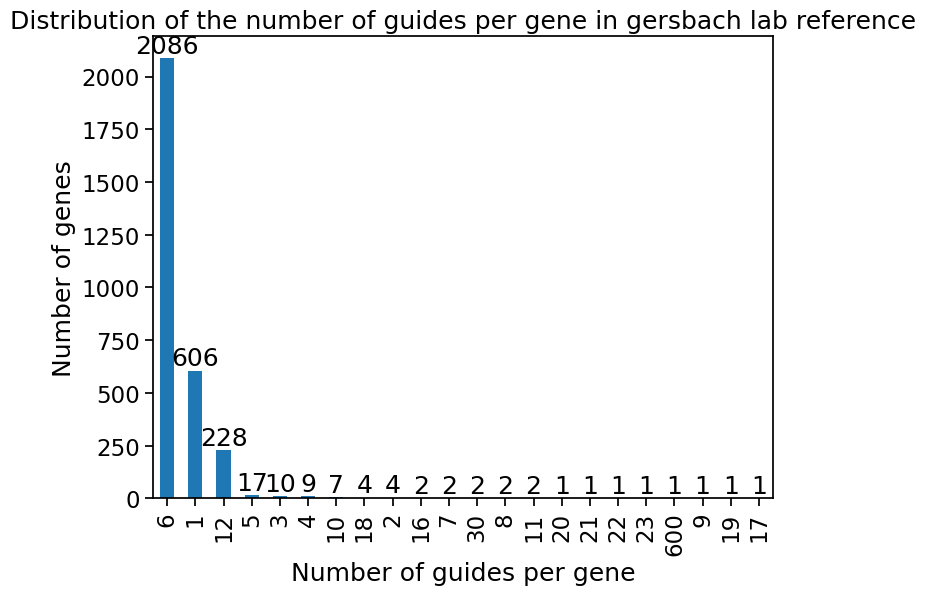

In [56]:
# Plot 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    gersbach_guide_ref["target_gene_name"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(gersbach_guide_ref["target_gene_name"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in gersbach lab reference")
    plt.show()

In [57]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
print(gersbach_guide_ref["target_gene_name"].isin(negative_control_genes).sum())
print(negative_control_genes[:10])

0
['OR1J4' 'OR10K1' 'OR5L2' 'OR52W1' 'OR8K1' 'OR4E2' 'OR4C12' 'OR51T1'
 'OR1M1' 'OR51F2']


In [58]:
# Is it because the Gersbach lab negative controls are hyphenated?
gersbach_negative_controls_spl = gersbach_guide_ref["target_gene_name"].str.split('-').str[0]   #.str.replace("-", "")
print(gersbach_guide_ref[gersbach_guide_ref['id'].str.startswith("OR")]["target_gene_name"].values[:10])
print(gersbach_negative_controls_spl.isin(negative_control_genes).sum())

['OR5K2-2' 'OR51A4-1' 'OR5T3-2' 'OR6C1-3' 'OR8G5-3' 'OR4A5-5' 'OR8G5-6'
 'OR4E2-6' 'OR4K13-2' 'OR2F2-5']
598


In [59]:
# What about positive controls, should have 19?
gersbach_guide_ref["target_gene_name"].isin(positive_control_genes).sum()

np.int64(19)

In [60]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_gersbach(row):
    if row["id"].startswith("non-targeting"):
        return "non_targeting"
    elif row["id"].startswith("OR"):
        return "negative_control"
    elif row["target_gene_name"] in positive_control_genes:
        return "positive_control"
    else:
        return "targeting"
    
gersbach_guide_ref["type"] = gersbach_guide_ref.apply(annotate_guide_type_gersbach, axis=1)
guide_type_counts = gersbach_guide_ref["type"].value_counts()
print(guide_type_counts)

type
targeting           15817
non_targeting         600
negative_control      598
positive_control       19
Name: count, dtype: int64


# Engreitz Lab annotations

In [61]:
engreitz_guide_ref = pd.read_csv(path_engreitz_guide_ref)
print(f"Total guides in Engreitz lab reference: {engreitz_guide_ref.shape[0]}")

Total guides in Engreitz lab reference: 17017


In [62]:
# Describe the dataframes; note that there are no feature types provided
engreitz_guide_ref.describe()

,guide_name,prefix,guide_sequence,suffix,target_gene
count,17017,17017,17017,17017,17017
unique,17017,1,17017,1,3096
top,GREGoR_17332,AAGCAGTGGTATCAACGCAGAGTGAATGGG,GTATTGTAAACTACAGCCCA,GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...,ESRRG
freq,1,17017,1,17017,30


In [63]:
# how many ids start with non-targeting
engreitz_guide_ref["target_gene"].str.startswith("non-targeting").sum()
print(engreitz_guide_ref[engreitz_guide_ref["target_gene"].str.startswith("non-targeting")].head())
print(non_targeting_ids[:10])

                      guide_name                          prefix  \
13731  non-targeting_00642_13861  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
13732  non-targeting_00718_13862  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
13733  non-targeting_03631_13863  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
13734  non-targeting_03705_13864  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
13735  non-targeting_01469_13865  AAGCAGTGGTATCAACGCAGAGTGAATGGG   

             guide_sequence  \
13731  GGAGTTAAGGCCTCGTCTAG   
13732  GTCCCAGGCTCTCCACTATG   
13733  GGACGCGTCTGCAAGAACGT   
13734  GGGCATGGACCCGCGGCACG   
13735  GCGTCCGAGGTACTGAATAA   

                                                  suffix          target_gene  
13731  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...  non-targeting_00642  
13732  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...  non-targeting_00718  
13733  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...  non-targeting_03631  
13734  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...  non-targeting_03705  
1373

In [64]:
# are these the same as the non_targeting_ids?
non_targeting_ids_in_engreitz = engreitz_guide_ref[engreitz_guide_ref["target_gene"].isin(non_targeting_ids)]
print(f"Non-targeting guides in engreitz reference: {non_targeting_ids_in_engreitz.shape[0]}")
non_targeting_match = non_targeting_ids_in_engreitz["target_gene"].isin(non_targeting_ids)
print(f"Do non-targeting guides match? {non_targeting_match.all()}")

Non-targeting guides in engreitz reference: 600
Do non-targeting guides match? True


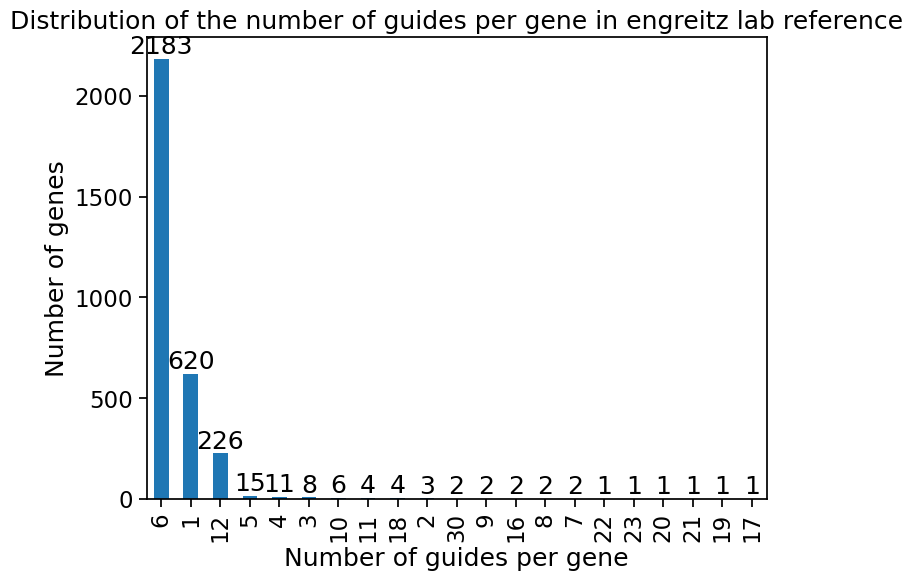

In [65]:
# Plot 
with sns.plotting_context("notebook", font_scale=1.5):
    plt.figure(figsize=(8, 6))
    engreitz_guide_ref["target_gene"].value_counts().value_counts().plot(kind='bar')
    # put numbers above bars
    for i, v in enumerate(engreitz_guide_ref["target_gene"].value_counts().value_counts()):
        plt.text(i, v + 0.5, str(v), ha='center', va='bottom')
    plt.xlabel("Number of guides per gene")
    plt.ylabel("Number of genes")
    plt.title("Distribution of the number of guides per gene in engreitz lab reference")
    plt.show()

In [66]:
# How many guides target a gene in the negative control list? Should be 600 (we have 100 targets with 6 guides each)
print(engreitz_guide_ref["target_gene"].isin(negative_control_genes).sum())
print(negative_control_genes[:10])

597
['OR1J4' 'OR10K1' 'OR5L2' 'OR52W1' 'OR8K1' 'OR4E2' 'OR4C12' 'OR51T1'
 'OR1M1' 'OR51F2']


In [67]:
# Is there one that is missing?
print(len(negative_control_genes))
print(set(negative_control_genes).difference(engreitz_guide_ref["target_gene"]))
print(set(engreitz_guide_ref[engreitz_guide_ref["target_gene"].str.startswith("OR")]['target_gene']).difference(negative_control_genes))
print(set(huangfu_guide_ref[huangfu_guide_ref['id'].str.startswith("OR")]['sequence']) - set(engreitz_guide_ref[engreitz_guide_ref["target_gene"].str.startswith("OR")]['guide_sequence']))

# Corresponds to OR2T5_3

100
set()
set()
{'GAGTTGGATTTCATCCTCAT'}


In [68]:
# What about positive controls, should have 19?
engreitz_guide_ref["target_gene"].isin(positive_control_genes).sum()

np.int64(4)

In [69]:
# What's the difference?
print(set(positive_control_genes).difference(engreitz_guide_ref["target_gene"]))

# Search for these genes with variable labels
missing_pos_controls = set(positive_control_genes).difference(engreitz_guide_ref["target_gene"])
combined_pattern = '|'.join(missing_pos_controls)
matches = engreitz_guide_ref["target_gene"].str.contains(combined_pattern, na=False, regex=True)
print(engreitz_guide_ref[matches].head())

# Each has appendices (e.g.. '_sgRNA_main_A', or '_strong')

{'ITGB1', 'CD29', 'DNAJC19', 'CD55', 'CD81', 'POLR1D', 'AARS', 'CD151'}
                  guide_name                          prefix  \
14331     AARS sgRNA B_14461  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
14332     AARS sgRNA C_14464  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
14333  AARS sgRNA main_14467  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
14335     CD151_strong_14480  AAGCAGTGGTATCAACGCAGAGTGAATGGG   
14336       CD151_weak_14490  AAGCAGTGGTATCAACGCAGAGTGAATGGG   

             guide_sequence  \
14331  GCGGCGACCCTAGGAGAGGT   
14332  GCCGCCCTCGGAGAGCTCTG   
14333  GTCTGCGGGAATAGGTGCAG   
14335  GCCGGACTCGGACGCGTGGT   
14336  GCCGCTCGGCCGAGCTGTCG   

                                                  suffix      target_gene  
14331  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...     AARS sgRNA B  
14332  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...     AARS sgRNA C  
14333  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCGT...  AARS sgRNA main  
14335  GTTTAAGAGCTAAGCTGGAAACAGCATAGCAAGTTTAAAATCTCG

In [70]:
# Final thing: annotated types of guides
# 1. If it starts with "non-targeting", it's a non-targeting guide
# 2. If it starts with "OR", it's a negative control
# 3. If its in the positive control list, it's a positive control
# 4. Otherwise its a targeting guide
def annotate_guide_type_engreitz(row):
    if row["target_gene"].startswith("non-targeting"):
        return "non_targeting"
    elif row["target_gene"].startswith("OR"):
        return "negative_control"
    elif check_if_pos_control(row['target_gene']):
        return "positive_control"
    else:
        return "targeting"

import re
def check_if_pos_control(targ_gene):
    base_gene = re.split(r'[_\s(]', targ_gene)[0].upper()
    if(base_gene in set(positive_control_genes)):
        return True
    return False

engreitz_guide_ref["type"] = engreitz_guide_ref.apply(annotate_guide_type_engreitz, axis=1)
guide_type_counts = engreitz_guide_ref["type"].value_counts()
print(guide_type_counts)

print(set(engreitz_guide_ref[engreitz_guide_ref["type"] == "positive_control"]['target_gene']))
print(positive_control_genes)

type
targeting           15802
non_targeting         600
negative_control      597
positive_control       18
Name: count, dtype: int64
{'AARS sgRNA main', 'MALAT1', 'DNAJC19_sgRNA_main', 'POLR1D_sgRNA_main', 'DNAJC19_sgRNAB', 'DNAJC19_sgRNA_C', 'AARS sgRNA C', 'AARS sgRNA B', 'CD29_(ITGB1)', 'CD151_strong', 'NGFRAP1', 'POLR1D_sgRNA_C', 'TFRC', 'CD55_strong', 'POLR1D_sgRNA_B', 'B2M', 'CD151_weak'}
['CD81' 'CD81' 'CD151' 'CD151' 'CD55' 'CD29' 'B2M' 'AARS' 'AARS' 'AARS'
 'POLR1D' 'POLR1D' 'POLR1D' 'DNAJC19' 'DNAJC19' 'DNAJC19' 'MALAT1'
 'NGFRAP1' 'TFRC' 'ITGB1']


In [71]:
# Which one is missing?
# Extract base gene names from found_genes
def extract_base_gene(s):
    return re.split(r'[_\s(]', s)[0].upper()

found_base_genes = {extract_base_gene(g) for g in set(engreitz_guide_ref[engreitz_guide_ref["type"] == "positive_control"]['target_gene'])}
print(set(positive_control_genes) - set(found_base_genes)) # missing CD81

{'ITGB1', 'CD81'}


# Look for overlap with Pool F

In [72]:
# Optional "Pool F" guides - see if the Gersbach or Engreitz groups' non-targeting guides overlap this 
pool_f = pd.read_csv(local_path + "poolF_sgRNAs.csv")
pool_f.head()

,sgRNA coordinates,Region name,Region coordinates,sgRNA protospacer sequence
0,chr9:104927901-104927919(+),ABCA1_P1P2,chr9:104927901-104928151,TAACGCCCAAGTAAGTCAC
1,chr9:104928028-104928046(+),ABCA1_P1P2,chr9:104927901-104928151,AGCAAAGCGCCCTGAGAAC
2,chr9:104928084-104928102(+),ABCA1_P1P2,chr9:104927901-104928151,GCCGCAGCCCGGGAGAGAA
3,chr9:104928088-104928106(+),ABCA1_P1P2,chr9:104927901-104928151,CAGCCCGGGAGAGAAGGGT
4,chr9:104928093-104928111(+),ABCA1_P1P2,chr9:104927901-104928151,CGGGAGAGAAGGGTCGGCT


In [73]:
# Add a reverse compliment column to Gersbach lab file for matching
def reverse_compliment(sequence):
    complement = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
    return "".join(complement.get(base, base) for base in reversed(sequence.upper()))

gersbach_guide_ref['reverse_compliment'] = gersbach_guide_ref['sequence'].apply(reverse_compliment)

In [74]:
# Get the targeting guides that do not overlap all files
hon_targeting = hon_guide_ref[hon_guide_ref['type'] == 'targeting']['protospacer']
hon_targeting = [seq.upper() for seq in hon_targeting]
huangfu_targeting = huangfu_guide_ref[huangfu_guide_ref['type'] == 'targeting']['sequence']
huangfu_targeting = [seq.upper() for seq in huangfu_targeting]
gersbach_targeting = gersbach_guide_ref[gersbach_guide_ref['type'] == 'targeting']['reverse_compliment']
gersbach_targeting = [seq.upper() for seq in gersbach_targeting]
engreitz_targeting = engreitz_guide_ref[engreitz_guide_ref['type'] == 'targeting']['guide_sequence']
engreitz_targeting = [seq.upper() for seq in engreitz_targeting]


print("Hon:" + str(hon_targeting[:5]))
print("Huangfu:" + str(huangfu_targeting[:5]))
print("Gersbach:" + str(gersbach_targeting[:5]))
print("Engreitz:" + str(engreitz_targeting[:5]))

full_intersect = list(set(hon_targeting).intersection(huangfu_targeting, gersbach_targeting, engreitz_targeting))
len(full_intersect) #11,985 that intersect all reference files
hon_guide_ref[hon_guide_ref['protospacer'].isin(full_intersect)].to_csv(local_path + "all_lab_intersection.csv")

Hon:['GAAAAACGCGGACGCTGACG', 'GAAAAAGATCCTCTGAGAGG', 'GAAAAAGGCGACACATGACC', 'GAAAACAAGACCTAGAGCTC', 'GAAAACACCAACCCGGGCAG']
Huangfu:['GAGTGGCCGGTCCAGAGCTG', 'GGCGCCTCGAGGCCGAGTCA', 'GCCCCGGGAGGGCGGAGAAG', 'GCGAGGTCCTGGCGGCTAAT', 'GCGGGAGAGCTCCTCCAGGT']
Gersbach:['GAAAAACGCGGACGCTGACG', 'GAAAAAGATCCTCTGAGAGG', 'GAAAAAGGCGACACATGACC', 'GAAAACAAGACCTAGAGCTC', 'GTTTTCACCAACCCGGGCAG']
Engreitz:['GAGTGGCCGGTCCAGAGCTG', 'GGGATCAAGGCGAGAGGATC', 'GGCGCCTCGAGGCCGAGTCA', 'GCAGCAGCGGGGACCGAGAG', 'GCCCCGGGAGGGCGGAGAAG']


In [75]:
# How many do not intersect? 
hon_extra = list(set(hon_targeting) - set(full_intersect))
print("Hon " + str(len(hon_extra)))
huangfu_extra = list(set(huangfu_targeting) - set(full_intersect))
print("Huangfu " + str(len(huangfu_extra)))
gersbach_extra = list(set(gersbach_targeting) - set(full_intersect))
print("Gersbach " + str(len(gersbach_extra)))
engreitz_extra = list(set(engreitz_targeting) - set(full_intersect))
print("Engreitz " + str(len(engreitz_extra)))

Hon 1156
Huangfu 1162
Gersbach 3832
Engreitz 3817


In [84]:
# Do these intersect with Pool F?
print(len(set(hon_extra).intersection(pool_f['sgRNA protospacer sequence'])))
print(len(set(huangfu_extra).intersection(pool_f['sgRNA protospacer sequence'])))
print(len(set(gersbach_extra).intersection(pool_f['sgRNA protospacer sequence'])))
print(len(set(engreitz_extra).intersection(pool_f['sgRNA protospacer sequence'])))

print(len(pool_f['sgRNA protospacer sequence']))

0
0
2592
922
2745


In [77]:
# OK - do the remaining (non pool F) guides intersect each other?
from itertools import combinations
def all_intersections(named_lists, min_group_size=2):
    intersections = {}
    items = list(named_lists.items())
    for r in range(min_group_size, len(items)+1):  # all sizes from 2 to N
        for combo in combinations(items, r):
            names = [name for name, _ in combo]
            sets = [set(lst) for _, lst in combo]
            key = "&".join(names)
            intersections[key] = list(set.intersection(*sets))
    
    return intersections

gersbach_extra_nof = list(set(gersbach_extra) - set(pool_f['sgRNA protospacer sequence']))
engreitz_extra_nof = list(set(engreitz_extra) - set(pool_f['sgRNA protospacer sequence']))

res_all_intersect = all_intersections({"Hon": hon_extra, "Huangfu": huangfu_extra, "Gersbach": gersbach_extra_nof, "Engreitz": engreitz_extra_nof})
for group, shared in res_all_intersect.items():
    print(f"{group}: {len(shared)}")

Hon&Huangfu: 1156
Hon&Gersbach: 7
Hon&Engreitz: 1149
Huangfu&Gersbach: 7
Huangfu&Engreitz: 1149
Gersbach&Engreitz: 0
Hon&Huangfu&Gersbach: 7
Hon&Huangfu&Engreitz: 1149
Hon&Gersbach&Engreitz: 0
Huangfu&Gersbach&Engreitz: 0
Hon&Huangfu&Gersbach&Engreitz: 0


In [78]:
from itertools import chain

def partition_by_group_presence(named_lists):
    guide_to_groups = {}

    # Map each guide to all the groups it appears in
    for group, guides in named_lists.items():
        for guide in guides:
            guide_to_groups.setdefault(guide, set()).add(group)

    # Invert to get: group combination → list of guides
    pattern_to_guides = {}
    for guide, groups in guide_to_groups.items():
        key = "&".join(sorted(groups))
        pattern_to_guides.setdefault(key, []).append(guide)

    return pattern_to_guides

partitioned = partition_by_group_presence({"Hon": hon_extra, "Huangfu": huangfu_extra, "Gersbach": gersbach_extra_nof, "Engreitz": engreitz_extra_nof})
for group_combo, gids in sorted(partitioned.items(), key=lambda x: (-len(x[1]), x[0])):
    print(f"{group_combo}: {len(gids)} guides")

Engreitz: 1746 guides
Gersbach: 1233 guides
Engreitz&Hon&Huangfu: 1149 guides
Gersbach&Hon&Huangfu: 7 guides
Huangfu: 6 guides


c:\Users\sarae\anaconda3\envs\sara_env\Lib\site-packages\upsetplot\data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
c:\Users\sarae\anaconda3\envs\sara_env\Lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].filln

<Figure size 10000x1000 with 0 Axes>

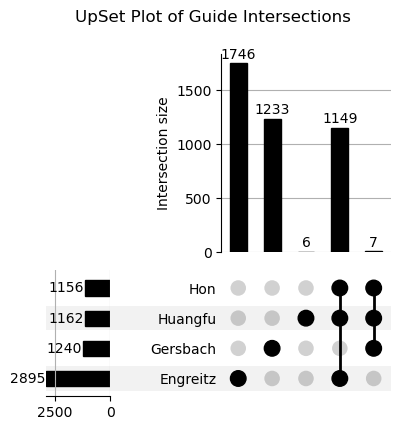

In [79]:
# Visualize as an UpSet plot
from upsetplot import UpSet, from_memberships

def prepare_upset_data(named_lists):
    # Convert each group's list into sets
    sets = {name: set(vals) for name, vals in named_lists.items()}

    # Get universe of all unique items
    all_guides = set.union(*sets.values())

    # Build membership list for each guide
    memberships = []
    for guide in all_guides:
        present_in = [name for name, s in sets.items() if guide in s]
        memberships.append(present_in)

    # Create the data in upsetplot-compatible format
    data = from_memberships(memberships)
    return data

# Usage
guide_sets = {
    "Hon": hon_extra,
    "Huangfu": huangfu_extra,
    "Gersbach": gersbach_extra_nof,
    "Engreitz": engreitz_extra_nof
}

upset_data = prepare_upset_data(guide_sets)

# Plot
plt.figure(figsize=(100, 10))
UpSet(upset_data, subset_size='count', show_counts=True).plot()
plt.suptitle("UpSet Plot of Guide Intersections")
plt.show()

In [80]:
print(len(set(engreitz_extra_nof).intersection(hon_extra, huangfu_extra)))
print(len(set(gersbach_extra_nof).intersection(hon_extra, huangfu_extra)))
print(len(set(hon_extra).intersection(huangfu_extra) - set(engreitz_extra_nof).union(gersbach_extra_nof)))

gers_miss = set(hon_extra).intersection(huangfu_extra, engreitz_extra_nof) - set(gersbach_extra_nof)
print(", ".join(set(huangfu_guide_ref[huangfu_guide_ref['sequence'].isin(gers_miss)]['id'])))
print(len(gers_miss))
hon_guide_ref[hon_guide_ref['protospacer_upper'].isin(gers_miss)].to_csv(local_path + "gersbach_missing.csv")
gers_xtra = set(gersbach_extra_nof) - set(hon_extra).intersection(huangfu_extra, engreitz_extra_nof)
print(", ".join(set(gersbach_guide_ref[gersbach_guide_ref['reverse_compliment'].isin(gers_xtra)]['target_gene_name'])))
print(len(gers_xtra))
gersbach_guide_ref[gersbach_guide_ref['reverse_compliment'].isin(gers_xtra)].to_csv(local_path + "gersbach_extra.csv")


engr_miss = set(hon_extra).intersection(huangfu_extra, gersbach_extra_nof) - set(engreitz_extra_nof)
print(", ".join(set(huangfu_guide_ref[huangfu_guide_ref['sequence'].isin(engr_miss)]['id'])))
print(len(engr_miss))
engr_xtra = set(engreitz_extra_nof) - set(hon_extra).intersection(huangfu_extra, gersbach_extra_nof) 
print(", ".join(set(engreitz_guide_ref[engreitz_guide_ref['guide_sequence'].isin(engr_xtra)]['guide_name'])))
print(len(engr_xtra))
engreitz_guide_ref[engreitz_guide_ref['guide_sequence'].isin(engr_xtra)].to_csv(local_path + "engreitz_extra.csv")

1149
7
0
EMX1_P1_4, TEAD1_1, ZNF366_1, MBD2_4, KCMF1_1, PURG_1, GMEB2_2, ZNF112_5, CTBP2_6, ZBTB39_6, ZNF417_3, ZNF652_4, ETV6_2, NFIX_P1_2, HDGF_6, PAX6_3, SLC2A4RG_2, ZNF534_3, ANHX_3, BARX1_3, CRTC3_2, ZFHX2_P1_3, NCOA3_4, ZBTB44_1, CAMTA1_2, ZNF653_5, EGR3_1, PAX9_P2_1, ZNF311_4, GTF2IRD2B_2|GTF2IRD2_2, RORB_1, ZNF703_4, ZBTB2_2, PATZ1_P2_6, ZNF177_P1_1, PPARA_3, RFX7_5, ZNF618_5, THAP4_5, POU2F3_P1_2, NACC2_5, KMT2B_P2_6, TIGD2_6, CBFB_4, KMT2B_P2_3, LMX1B_1, HDGF_1, RUNX3_P2_1, SOX18_1, CPEB1_P1_3, ZBTB40_2, ZNF628_4, BARX1_5, ARID2_6, GTF2IRD1_5, GSC2_1, CHD7_4, NCOA3_1, WHSC1_2, TEAD3_1, CREM_3, ZFP14_3, FOXK2_1, ARID3A_3, NR2F2_4, STRAP_6, ZNF704_5, ZNF699_P1_3, BRPF1_5, FOXF1_3, MXD3_6, MTA1_5, JDP2_3, NFATC3_5, ZSCAN31_P1_5, ERG_P1_2, NFE4_3, ZNF587_6, TCEB2_5, TFEB_P1_1, HOXD13_1, SCRT1_1, ZNF501_2, NOTCH1_P1_3, ZFP42_P1_3, ASCL3_6, IKZF5_2, ZFPM1_6, NFE2L3_3, ZSCAN31_P1_6, MSLN_3, ZSCAN5A_P1_6, ZFHX3_3, SKI_3, EBF4_5, ASCL3_5, ZFP42_P1_1, ZNF273_P1_4, ZBTB4_P1_3, NR2F6_2, 

In [81]:
# Which of these are present in the "target_genes.csv" file?
all_targeting_photosp = targets.iloc[:, [5,6,7,8,9,10]].values.tolist()

def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

all_targeting_photosp = flatten_list(all_targeting_photosp)
all_targeting_photosp = [item.upper() for item in all_targeting_photosp]
print(all_targeting_photosp[:3])

print(len(set(gers_miss).intersection(set(all_targeting_photosp))))
print(len(set(gers_xtra).intersection(set(all_targeting_photosp))))
print(len(set(engr_miss).intersection(set(all_targeting_photosp))))
print(len(set(engr_xtra).intersection(set(all_targeting_photosp))))

['GAGTGGCCGGTCCAGAGCTG', 'GGGATCAAGGCGAGAGGATC', 'GAAGGCGAGAGGATCCGGCA']
1149
7
7
1149


# Take the union across everything and merge into one file, including the mismatches, based on sequence

In [82]:
# Give columns unified names; let the file be 5' in the protospacer column, with a 3' reverse compliment column
hon_new_colnames = ['id_hon', 'protospacer_mixed', 'intended_target_name_hon', 'type', 'genomic_element', 'reverse_compliment', 'protospacer']
huangfu_new_colnames = ['id_huangfu', 'name', 'read', 'pattern', 'protospacer', 'feature_type', 'intended_target_name_huangfu', 'type']
gersbach_new_colnames = ['id_gersbach', 'name', 'read', 'pattern', 'reverse_compliment', 'feature_type', 'intended_target_name_gersbach', 'type', 'protospacer']
engreitz_new_colnames = ['id_engreitz', 'prefix', 'protospacer', 'suffix', 'intended_target_name_engreitz', 'type']

hon_guide_ref_upd = hon_guide_ref
hon_guide_ref_upd.columns = hon_new_colnames

huangfu_guide_ref_upd = huangfu_guide_ref
huangfu_guide_ref_upd.columns = huangfu_new_colnames

gersbach_guide_ref_upd = gersbach_guide_ref
gersbach_guide_ref_upd.columns = gersbach_new_colnames

engreitz_guide_ref_upd = engreitz_guide_ref
engreitz_guide_ref_upd.columns = engreitz_new_colnames

In [83]:
# Merge
merged = pd.merge(
    hon_guide_ref_upd[['id_hon', 'protospacer', 'type', 'intended_target_name_hon', 'reverse_compliment', 'genomic_element']],
    gersbach_guide_ref_upd[['id_gersbach', 'protospacer', 'type', 'intended_target_name_gersbach', 'reverse_compliment']],
    on=["protospacer", "type", "reverse_compliment"],
    how="outer",
)
merged = pd.merge(
    merged,
    huangfu_guide_ref_upd[['id_huangfu', 'protospacer', 'type', 'intended_target_name_huangfu']],
    on=["protospacer", "type"],
    how="outer",
)
merged = pd.merge(
    merged,
    engreitz_guide_ref_upd[['id_engreitz', 'protospacer', 'type', 'intended_target_name_engreitz']],
    on=["protospacer", "type"],
    how="outer",
)

merged['missing_count'] = merged.isnull().sum(axis=1)
merged_sorted = merged.sort_values(by='missing_count')
merged_sorted = merged_sorted.drop('missing_count', axis=1)
merged_sorted.head()

merged_sorted.to_csv(local_path + "outer_merged_file.csv", index = False, header = True)

In [ ]:
# Also create separate Pool F and Pool A-D files

### POOL F ###
gersbach_guide_ref_upd_pf = gersbach_guide_ref_upd[gersbach_guide_ref_upd['protospacer'].isin(pool_f['sgRNA protospacer sequence'])]
print(gersbach_guide_ref_upd_pf.shape)
engreitz_guide_ref_upd_pf = engreitz_guide_ref_upd[engreitz_guide_ref_upd['protospacer'].isin(pool_f['sgRNA protospacer sequence'])]
print(engreitz_guide_ref_upd_pf.shape)
print(len(set(gersbach_guide_ref_upd_pf['protospacer']).intersection(engreitz_guide_ref_upd_pf['protospacer'])))  # All Jesse's pool F guides are covered in Gersbach's

merged_poolf = pd.merge(
    gersbach_guide_ref_upd_pf[['id_gersbach', 'protospacer', 'type', 'intended_target_name_gersbach', 'reverse_compliment']],
    engreitz_guide_ref_upd_pf[['id_engreitz', 'protospacer', 'type', 'intended_target_name_engreitz']],
    left_on=["protospacer", "type"],
    right_on=["protospacer", "type"],
    how="outer"
)


merged_poolf['missing_count'] = merged_poolf.isnull().sum(axis=1)
merged_poolf_sorted = merged_poolf.sort_values(by='missing_count')
merged_poolf_sorted = merged_poolf_sorted.drop('missing_count', axis=1)
merged_poolf_sorted.head()

print(merged_poolf_sorted.head())
print(merged_poolf_sorted.shape)

merged_poolf_sorted.to_csv(local_path + "outer_merged_file_poolf.csv", index = False, header = True)

(2592, 9)
(922, 6)
922
       id_gersbach          protospacer       type  \
1253       NR2F2.2  GAAAACCGCCAACAACTAT  targeting   
1279  IL6ST_P1P2.3  GAAGGATCTGACAGTGTTC  targeting   
1278   YEATS4_P1P2  GAAGGAGGGCGAGTTACTT  targeting   
1277   EPC2_P1P2.5  GAAGGAGGAGGAATCGGTA  targeting   
1276  GPR78_P1P2.2  GAAGGAAAGATACAGTGTT  targeting   

     intended_target_name_gersbach   reverse_compliment   id_engreitz  \
1253                         NR2F2  ATAGTTGTTGGCGGTTTTC   NR2F2_16801   
1279                         IL6ST  GAACACTGTCAGATCCTTC   IL6ST_15386   
1278                        YEATS4  AAGTAACTCGCCCTCCTTC  YEATS4_16626   
1277                          EPC2  TACCGATTCCTCCTCCTTC    EPC2_15173   
1276                         GPR78  AACACTGTATCTTTCCTTC   GPR78_15325   

     intended_target_name_engreitz  
1253                         NR2F2  
1279                         IL6ST  
1278                        YEATS4  
1277                          EPC2  
1276                        

In [98]:
### POOL A-D ###
gersbach_guide_ref_upd_pad = gersbach_guide_ref_upd[~gersbach_guide_ref_upd['protospacer'].isin(pool_f['sgRNA protospacer sequence'])]
print(gersbach_guide_ref_upd.shape)
print(gersbach_guide_ref_upd_pad.shape)
engreitz_guide_ref_upd_pad = engreitz_guide_ref_upd[~engreitz_guide_ref_upd['protospacer'].isin(pool_f['sgRNA protospacer sequence'])]
print(engreitz_guide_ref_upd.shape)
print(engreitz_guide_ref_upd_pad.shape)

merged_poolad = pd.merge(
    hon_guide_ref_upd[['id_hon', 'protospacer', 'type', 'intended_target_name_hon', 'reverse_compliment', 'genomic_element']],
    gersbach_guide_ref_upd_pad[['id_gersbach', 'protospacer', 'type', 'intended_target_name_gersbach', 'reverse_compliment']],
    on=["protospacer", "type", "reverse_compliment"],
    how="outer",
)
merged_poolad = pd.merge(
    merged_poolad,
    huangfu_guide_ref_upd[['id_huangfu', 'protospacer', 'type', 'intended_target_name_huangfu']],
    on=["protospacer", "type"],
    how="outer",
)
merged_poolad = pd.merge(
    merged_poolad,
    engreitz_guide_ref_upd_pad[['id_engreitz', 'protospacer', 'type', 'intended_target_name_engreitz']],
    left_on=["protospacer", "type"],
    right_on=["protospacer", "type"],
    how="outer"
)

merged_poolad['missing_count'] = merged_poolad.isnull().sum(axis=1)
merged_poolad_sorted = merged_poolad.sort_values(by='missing_count')
merged_poolad_sorted = merged_poolad_sorted.drop('missing_count', axis=1)
merged_poolad_sorted.head()

print(merged_poolad_sorted.head())
print(merged_poolad_sorted.shape)

merged_poolad_sorted.to_csv(local_path + "outer_merged_file_poolabcd.csv", index = False, header = True)

(17034, 9)
(14442, 9)
(17017, 6)
(16095, 6)
                           id_hon           protospacer              type  \
4340   TFEC_-_115670779.23-P1P2-1  GCATATGCACCATGCCAGAA         targeting   
10050  NR2C1_-_95467292.23-P1P2-2  GGATGTGGGATCGAGATTCA         targeting   
17346   NANOG_+_7942459.23-P1P2-2  GTTTTTCCATTATAACTTGG         targeting   
17347                     OR8B3-5  GTTTTTGTCTTCAAAAATCT  negative_control   
8065   ZNF48_+_30406782.23-P1P2-1  GCTCCGCGCCAAGCCGGGAG         targeting   

      intended_target_name_hon    reverse_compliment genomic_element  \
4340                      TFEC  TTCTGGCATGGTGCATATGC        promoter   
10050                    NR2C1  TGAATCTCGATCCCACATCC        promoter   
17346                    NANOG  CCAAGTTATAATGGAAAAAC        promoter   
17347                    OR8B3  AGATTTTTGAAGACAAAAAC        promoter   
8065                     ZNF48  CTCCCGGCTTGGCGCGGAGC        promoter   

                      id_gersbach intended_target_name_gersb